In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 24: Hypothesis Testing Errors & Power

Throughout this block, we have been studying hypothesis tests. We have covered the four basic steps of any hypothesis test, and we have practiced various methods for obtaining the distribution of our test statistic under the null hypothesis. 

After we have reached a conclusion (reject or fail to reject), we must consider possible errors. 

### Type I error 

Type I error is the event that we rejected the null hypothesis when the null hypothesis was actually true. Type I error is also known as a false positive. The probability of a Type I error is usually defined by the threshold used for rejection. A common threshold is 0.05. Those of you who have taken statistics before may recognize this value as $\alpha$. 

### Type II error

Type II error is the event that we failed to reject the null hypothesis when the null hypothesis was actually false. This is otherwise known as a false negative. The probability of a Type II error is harder to find and requires a more in-depth analysis of a hypothesis test. The probability of a Type II error is often given as $\beta$, and $1-\beta$ is referred to as **Power**. The power of a test is probability that we will reject the null hypothesis when we are supposed to. 

Which one of these errors is more serious? It depends on the context of the problem. 

### Example: Golf Balls

Joe has a summer job at a golf course and one of his jobs is to fish out golf balls from the water traps. He has a theory that certain types of golf ball are more likely to end up in the water than others. Let's assume there are four brands of golf ball, let's and assume that all four are used equally at this golf course. He fishes out 100 golf balls and counts each brand. He finds 30 of brand A, 30 of brand B, 20 of brand C and 20 of brand D. Conduct a hypothesis test to determine whether certain types of golf ball are more likely than others to end up in the water.

Step 1: Hypotheses
Null: The golf balls (specific brands) that end up in the water are due to chance.
Alternative: Certain brands are more likely to end up in the water than others.

Step 2: Test statistic

There are many correct answers, but let's go with sum of absolute difference between observed and expected counts under $H_0$. To do this, we need to find the expected counts. If each ball was equally likely, how many should we expected to find of each if we select 100 golf balls? 

Formulaically, the test statistic is: $$\sum \bigg{|}{E_A-Obs_A}\bigg{|}+\bigg{|}E_B-Obs_B\bigg{|}+\bigg{|}E_C-Obs_C\bigg{|}+\bigg{|}E_D-Obs_D\bigg{|}$$
Where $E_{A,B,C,D}$ is the expected value of A,B,C, or D and $Obs_{A,B,C,D}$ is what we observe. If the null were true, we should get a distribution near zero, or close to zero most of the time.  

In [2]:
#Observed - expected
ExpectedValues=np.repeat(['A','B','C','D'],[25,25,25,25]) #Repeats 25 variations of each type of ball.
ObservedValues=np.repeat(['A','B','C','D'],[30,30,20,20]) #30 A, 30 B, 20 C, 20 D. 
def TestMeasure(ExpectedValues,ObservedValues):
    ## Calclates (assuming 4 types of balls) the test statistic of the sum of the absolute
    ##difference between observed and expected ***
    Teststat=[]
    for letter in ['A','B','C','D']:
        AbsoluteDiff=abs(sum(ObservedValues==letter)-sum(ExpectedValues==letter))
        Teststat=np.append(Teststat,AbsoluteDiff)
    return sum(Teststat)
TestMeasure(ExpectedValues=ExpectedValues,ObservedValues=ObservedValues) 
#We should expect 20 because (abs(30-25)+abs(30-25)+abs(20-25)+abs(20-25))=5+5+5+5=20

20.0

Step 3: $p$-value

We need the distribution of the test statistic under $H_0$. 

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


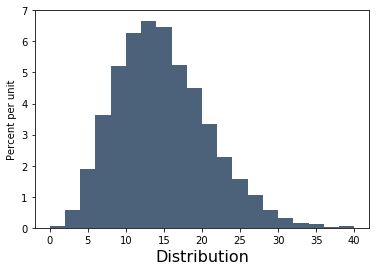

In [3]:
#The p value in this context is: what is the probability that our test statistic gives us 20? Let's bootstap this.
Trials=10000
Distribution=[] #Initialize as an empty array to begin with
for i in np.arange(Trials): #repeat for n trials
    Simulated=np.random.choice(ExpectedValues,size=len(ExpectedValues),replace=True) #replace is by default True, but I still
    #like to see that I am sampling with replacement.
    Distribution=np.append(Distribution,TestMeasure(ExpectedValues,ObservedValues=Simulated))
Table().with_column('Distribution',Distribution).hist(bins=20)

Now that we have the distribution all histogrammed out nicely, it looks like have a value of 20 or greater is... more likely than the guy expected. Let's now find the p value, which can be interpreted as $p=P(X\geq 20)$.

In [4]:
pval=sum(Distribution>=20)/Trials
print(pval)

0.19


Step 4: Conclude
Since our value is greater than .05, we conclude that 30,30,20,20 of A,B,C, and D respectively is not statistically significant enough to reject the null hypothesis assuming there is an equal distribution of each brand. Therefore, in the context of the problem, there is an 18% chance that we could have achieved the number of balls in the pond that we did.

What kind of error could we have made in this case? 

By definition, this is could be a Type 2 Error. That is, we would have failed to reject the null hypothesis but the null was actually false. In otherwords, we got a false negative. In the context of the problem, we may have wrongly concluded that the distribution of balls occured in the pond by chance.

#### Power 
Suppose that, in truth, 30% of the balls found in the water were brand A, 30% were brand B, 20% were brand C and 20% were brand D. In this case, our collected sample reflected this truth perfectly. However, our hypothesis test failed to recognize this deviation from equal proportions. We made a type II error. This is because this test has fairly low power. Use simulation to determine the power of this test. 

I am looking for the probability that I reject the null hypothesis given the true proportions laid out above. Well, first I need to figure out for what values of my test statistic I would reject $H_0$. 

In [5]:
#Given our distribution above, let's figure out what's needed to get a p value less than or equal to above.
n=0 #Initialize increase
while pval>.05:
    n=n+1
    pval=sum(Distribution>=20+n)/Trials
print(pval,20+n)

0.047 25


Let's take a step back and figure out why we did this. Earlier, we found that the test statistic of 20, with an equal distribution occurs roughly 18% of the time.That was not statistically significant enough within the distribution to reject the null hypothesis. So, we keep increasing the statistic here until we get a value that is considered high enough to reject the null. In this case, the sum of the absolute differences of 25 or greater yields a p value that is below .05 and signifies what we should aim for to reject the null. 

Next, I need to simulate from the true population and determine how often my test statistic would have met this threshold. 

Pause again: Let's figure out what we are doing here again. We've now assumed that the alternative is true, that is, the true population is 30,30,20,20. The question we are now analyzing is: given that we know the null is false/the alternative is true, how often do we properly reject the null hypothesis? 
This is very nuanced and more examples should be considered in full.

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


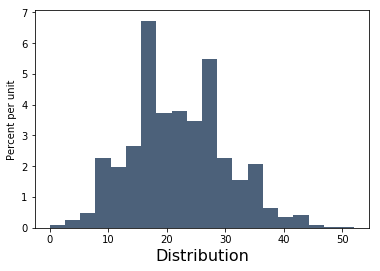

In [6]:
ActualVal=np.repeat(['A','B','C','D'],[30,30,20,20]) #Given our true distribution, this is what we should expect now... bear with me
#Copied from step 3 above.
Trials=10000
Distribution=[] #Initialize as an empty array to begin with
for i in np.arange(Trials): #repeat for n trials
    Simulated=np.random.choice(ActualVal,size=len(ActualVal),replace=True) #THIS LINE IS VERY IMPORTANT compared to before
    Distribution=np.append(Distribution,TestMeasure(ExpectedValues,ObservedValues=Simulated)) #THIS LINE IS ALSO VERY IMPORTANT
Table().with_column('Distribution',Distribution).hist(bins=20)

In [7]:
pval=sum(Distribution>=25)/Trials
pval*100

33.77

Yet again, we must pause and figure out how/why we got this number. Recall in the above box where I commented "THIS LINE IS VERY IMPORTANT". Me must dig deep into this line to figure out why we it is. Specifically, why did we pull from the ActualVal and then compare with the expected of beforehand? Let's rationalize this, as we are creating an argument using probability and mathematics. 

Given that we have our ACTUAL distribution of 30,30,20,20, we are going to sample from that with replacement, per the bootstrap method. Now, since we've sampled from our true population, we've going to get our test statistic given that we have a population such that the alternative is true. 

Then, we create a distribution of that test statistic and determine the probability we get greater than 25 because the question we are answering is: Given I have a "true" population, how often do I get a test statistic in which I can reject the null hypothesis?
    
Now, our answer to that: 34.72% of the time, with a true population, we correctly identify that we can reject the null hypothesis. Now, going back to the definitions of power and type II error: is the probability we failed to reject the null hypothesis when the null hypothesis was actually false, measured as $\beta$. So, given that $1-\beta$ is power, which is interpreted as the negation of the above statement: $\text{~}(A\implies B)=\text{~}A\wedge B$ ; for you less pure mathy people, this is read as the probability we successfully rejected the null hypothesis and the null hypothesis is actually false. Therefore, in a long circuoitous way, we've established that the power of our test is 34.72%.   

What do you think about this power? 

The power of this system is low... That is, the probability of making a type 2 error is $1-power=65.28\text{%}$. That's a fairly high probability with this true population we've made a type 2 error...

Repeat this power calculation, but assume Joe collects 500 balls instead of 100. Note that you will have to obtain a new critical value. What does this tell you about power and sample size?

Let's go back to the beginning and consider that we are simply scaling everything up by 5. So, 125 of each brand with a test statistic of 100 or greater.

First, original with equal distribution to find new critical value.

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


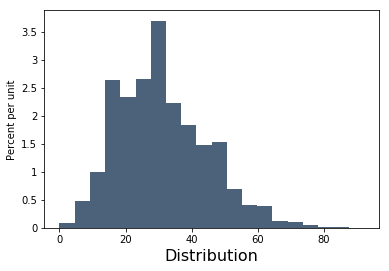

In [8]:
ExpectVal=np.repeat(['A','B','C','D'],5*np.array([25,25,25,25])) #
Trials=10000
Distribution=[] #Initialize as an empty array to begin with
#Expect this to take a while to run...
for i in np.arange(Trials): #repeat for n trials
    Simulated=np.random.choice(ExpectVal,size=len(ExpectVal),replace=True) #THIS LINE IS VERY IMPORTANT compared to before
    Distribution=np.append(Distribution,TestMeasure(ExpectVal,ObservedValues=Simulated)) #THIS LINE IS ALSO VERY IMPORTANT
Table().with_column('Distribution',Distribution).hist(bins=20)

In [9]:
pval=sum(Distribution>=(55))/Trials #computed by way of trial and error 
pval*100

5.08

Now find new power calculation with "true population" of 30,30,20,20 distribution given the new critical value of: 55 (what's needed to be statistically significant to reject the null)

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


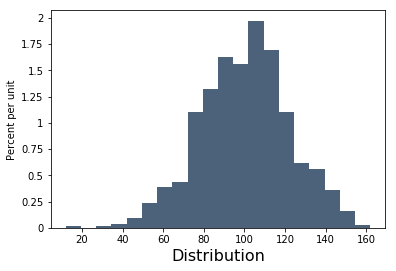

In [10]:
ActualVal=np.repeat(['A','B','C','D'],5*np.array([30,30,20,20])) # True population
ExpectVal=np.repeat(['A','B','C','D'],5*np.array([25,25,25,25])) # Expected population is equal distribution
Trials=1000
DistributionA=[] #Initialize as an empty array to begin with
#Expect this to take a while to run...
for i in np.arange(Trials): #repeat for n trials
    Simulated=np.random.choice(ActualVal,size=len(ActualVal),replace=True) #sample from true population
    DistributionA=np.append(DistributionA,TestMeasure(ExpectVal,Simulated)) #compare with expected population
Table().with_column('Distribution',DistributionA).hist(bins=20)

In [11]:
pvalA=np.mean((DistributionA>=(55)))
print(pvalA*100)

97.6


Our power is much, much, much better now. Therefore, the take away is, a large sample size is vital to increasing your accuracy. For curiousity, we will repeat for 2000 balls. At this point, we expect a power to be essentially 100. (I chose 2000 because that's an important number with random polling.) Let's say the "true" distribution is the same.

In [12]:
ExpectVal=np.repeat(['A','B','C','D'],20*np.array([25,25,25,25])) #
Trials=1000 #We don't need that many trials (especially if we are delving into the curiousity realm)
Distribution=[] #Initialize as an empty array to begin with
#Expect this to take a while to run...
for i in np.arange(Trials): #repeat for n trials
    Simulated=np.random.choice(ExpectVal,size=len(ExpectVal),replace=True) #THIS LINE IS VERY IMPORTANT compared to before
    Distribution=np.append(Distribution,TestMeasure(ExpectVal,ObservedValues=Simulated)) #THIS LINE IS ALSO VERY IMPORTANT
#No histogram, sorry but it should like what we've already done above.

In [13]:
pval=sum(Distribution>=(111))/Trials #computed by way of trial and error 
pval*100

4.3

In [14]:
# 111 is the new critical value! Copy from above and change a few things.
ActualVal=np.repeat(['A','B','C','D'],20*np.array([30,30,20,20])) # True population
ExpectVal=np.repeat(['A','B','C','D'],20*np.array([25,25,25,25])) # Expected population is equal distribution
Trials=1000
DistributionA=[] #Initialize as an empty array to begin with
#Expect this to take a while to run...
for i in np.arange(Trials): #repeat for n trials
    Simulated=np.random.choice(ActualVal,size=len(ActualVal),replace=True) #sample from true population
    DistributionA=np.append(DistributionA,TestMeasure(ExpectVal,Simulated)) #compare with expected population
powerA=np.mean(DistributionA>=(111)) #computed by way of trial and error 
powerA*100

100.0

In [15]:
#Just for curiousity, how much was actually over the critical value... 
sum(DistributionA>=(111))

1000

All of data is above 111, and this is what we expected. The larger the sample size, the more accurate the results and the higher the power is of the data.